# Renderização não-fotorealística: cartoonização de imagem
## Curso de Fotografia Computacional

### Upload das imagens

In [ ]:
!git clone https://github.com/kevinruiz182/image_processing_tools.git

Cloning into 'image_processing_tools'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 122 (delta 2), reused 10 (delta 2), pack-reused 108
Receiving objects: 100% (122/122), 46.98 MiB | 23.29 MiB/s, done.
Resolving deltas: 100% (15/15), done.


### Imports

In [ ]:
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
def show_image(img, figsize=(30, 15)):
  fig = plt.figure(figsize=figsize)
  ax = fig.add_subplot(1, 1, 1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(img, cmap="gray")
  plt.show()

def show_images(img_list, figsize=None):
  n = len(img_list)
  if figsize == None:
    figsize = (5 * n, 8)
  fig, ax = plt.subplots(1, n, figsize=figsize)
  for i in range(n):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(img_list[i], cmap="gray")
  plt.show()

### Carregando imagens

In [ ]:
files = list(sorted(glob("image_processing_tools/images/color_image_processing/*")))
files

['image_processing_tools/images/color_image_processing/1200px-Lua_cheia_de_prata.jpg',
 'image_processing_tools/images/color_image_processing/bald_eagle_portrait.jpg',
 'image_processing_tools/images/color_image_processing/lenna.png',
 'image_processing_tools/images/color_image_processing/lenna_noise.png',
 'image_processing_tools/images/color_image_processing/rgb_cube.png',
 'image_processing_tools/images/color_image_processing/strawberries.png',
 'image_processing_tools/images/color_image_processing/strawberries_low.png',
 'image_processing_tools/images/color_image_processing/thyroid.png',
 'image_processing_tools/images/color_image_processing/triangle_circle.png',
 'image_processing_tools/images/color_image_processing/xray.png']

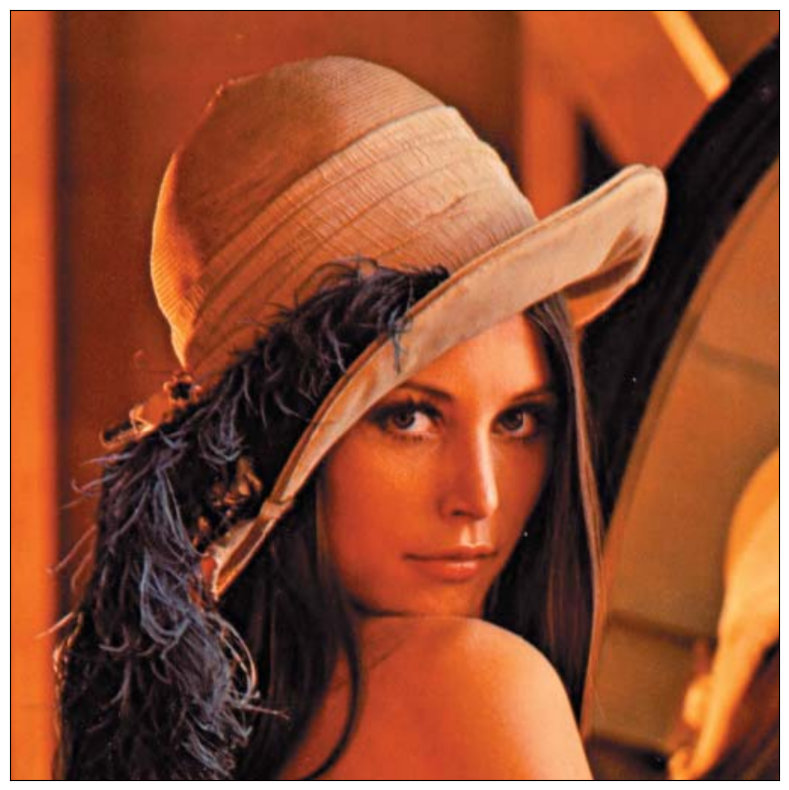

In [ ]:
image = cv2.imread(files[2])[..., ::-1]
show_image(image, (10, 10))

### Executando o NPR

In [ ]:
def quantize(c, levels):
    step = 100 / levels
    q_nearest = np.floor(c / step) * step
    phi_q = 0.25
    return q_nearest + (step / 2) * np.tanh(phi_q * (c - q_nearest))

In [ ]:
def dog(img, tau, sigma, k):
    low = cv2.GaussianBlur(img, (0, 0), sigma)
    high = cv2.GaussianBlur(img, (0, 0), k * sigma)
    return (low - tau * high)

In [ ]:
def xdog(l, sigma=2, k=np.sqrt(1.6), tau=0.99, phi_e=5):
    diff = dog(l, tau, sigma, k)
    edges = np.zeros_like(diff)
    edges[diff > 0] = 1
    edges[diff <= 0] = 1 + np.tanh(phi_e * diff)[diff <= 0]
    return np.clip(np.float32(edges), 0, 1)

In [ ]:
mask_luminance = lambda l, m: l * m

In [ ]:
def cartoon_effect(image):
    lab = cv2.cvtColor(image.astype("float32") / 255, cv2.COLOR_RGB2Lab)
    for i in range(3):
        lab = cv2.bilateralFilter(lab, 5, 3, 4.25)
    l, a, b = cv2.split(lab)
    q = quantize(l, 10)
    edges = xdog(l)
    new_l = mask_luminance(q, edges)
    lab = cv2.merge([new_l, a, b])
    return cv2.cvtColor(lab, cv2.COLOR_Lab2RGB)

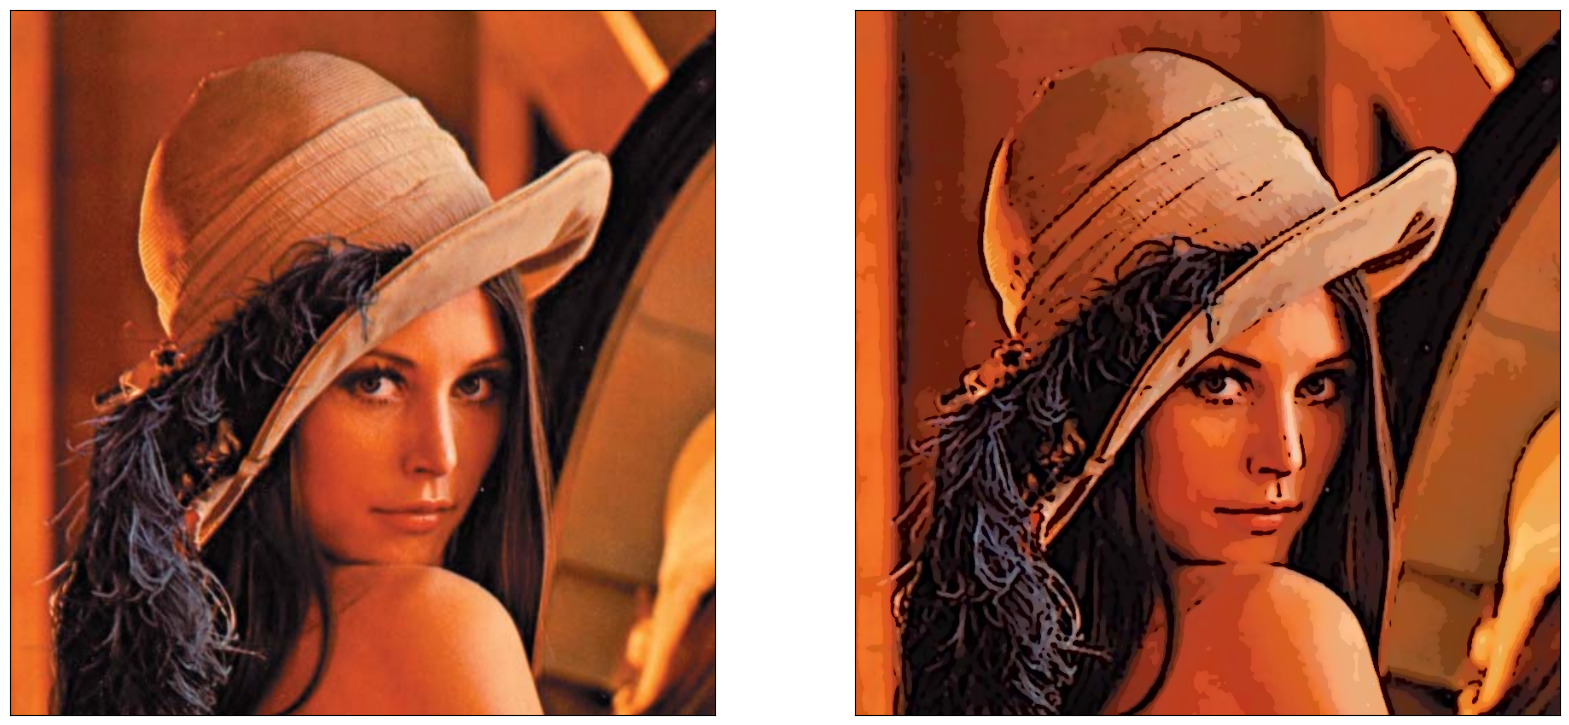

In [ ]:
cartoon = cartoon_effect(image)
show_images([image, cartoon], (20, 15))